## Project: Loan Approval Analysis
### Problem Statement
Dream Housing Finance Inc. specializes in home loans across different market segments - rural, urban and semi-urban. Their loan eligibility process is based on customer details provided while filling an online application form. To create a targeted marketing campaign for different segments, they have asked for a comprehensive analysis of the data collected so far.
About the Dataset.
The snapshot of the data, you will be working on :

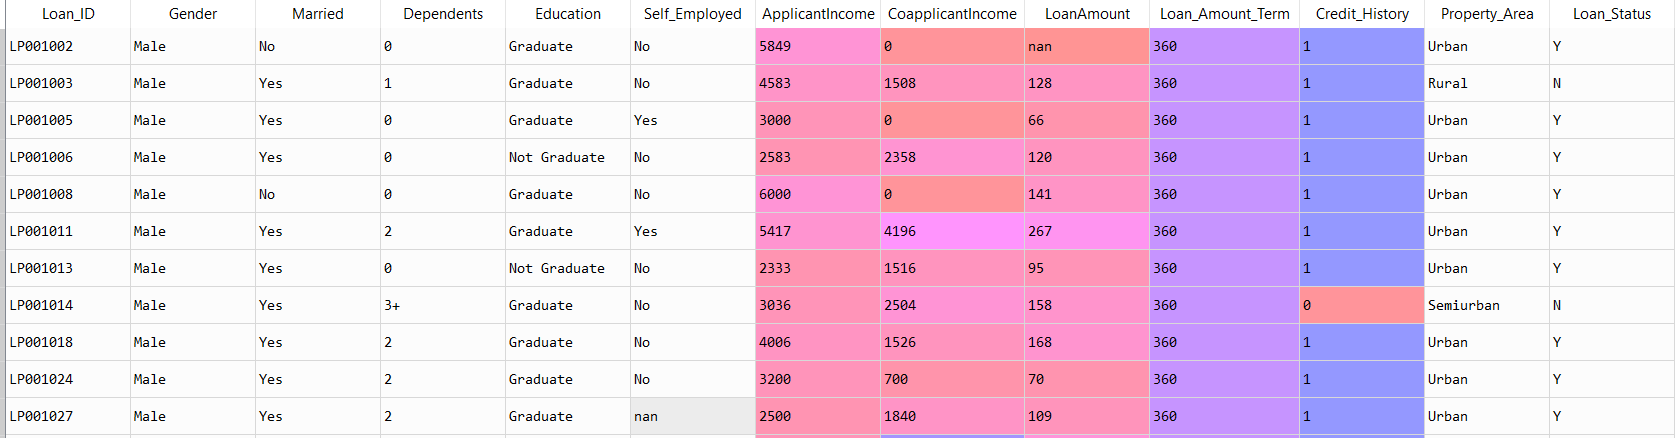

The dataset has details of 614 customers with the following 13 features

**Loan_ID:**	Unique Loan ID <br>
**Gender:**	Male/Female <br>
**Married:**	Applicant Married (Y/N) <br>
**Dependents:**	Number of dependents <br>
**Education:**	Graduate/Under Graduate <br>
**Self_Employed:**	Self employed (Y/N) <br>
**ApplicantIncome:**	Income of the applicant <br>
**CoapplicantIncome:**	Income of the co-applicant <br>
**LoanAmount:**	Loan amount in thousands <br>
**LoanAmountTerm:**	Term of loan in months <br>
**Credit_History:**	credit history meets guidelines} <br>
**Property_Area:**	Urban/Semi-Urban/Rural <br>
**Loan_Status:**	Loan approved (Y/N)

Our major work for this project involves data analysis using Pandas.

#### Why solve this project ?
After completing this project, you will have better grip on working with pandas. In this project you will apply following concepts.
* Dataframe slicing
* Dataframe aggregation
* Pivot table operations

In [1]:
# Importing header files
import numpy as np
import pandas as pd
from scipy.stats import mode 
import warnings
warnings.filterwarnings('ignore')

#Reading file
bank_data = pd.read_csv("C:\\Users\\sherw\\OneDrive\\Desktop\\GreyAtom Data Science Resources\\Datasets\\loan_prediction.csv")

### Instructions :

Let's check which variable is categorical and which one is numerical so that you will get a basic idea about the features of the bank dataset.
* The path for the dataset has been stored in a variable `path`
* Create dataframe `bank` by passing the path of the file
* Create the variable `categorical_var` and using `df.select_dtypes(include = 'object')` check all categorical values.
* print `categorical_var`
* Create the variable `numerical_var` and using `df.select_dtypes(include = 'number')` check all categorical values.
* print `numerical_var`

---
`categorical_var.shape` should be (614, 8) and `numerical_var.shape` should be (614, 5).

---

In [2]:
bank = pd.DataFrame(bank_data)
categorical_var = bank.select_dtypes(include = 'object')
print(categorical_var)

numerical_var = bank.select_dtypes(include = 'number')
print(numerical_var)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3      

### Step 2: 
Sometimes customers forget to fill in all the details or they don't want to share other details. Because of that, some of the fields in the dataset will have missing values. Now you have to check which columns have missing values and also check the count of missing values each column has. If you get the columns that have missing values, try to fill them.
* From the dataframe `bank`, drop the column `Loan_ID` to create a new dataframe `banks`
* To see the null values, use `isnull().sum()` function and print it.
* Calculate mode for the dataframe `banks` and store in `bank_mode`
* Fill missing (NaN) values of `banks` with `bank_mode` and store the cleaned dataframe back in `banks`.
* Check if all the missing values (`NaN`) are filled.
---
banks.shape should be (614 , 12) and `banks.isnull().sum().values.sum()` should be 0.

---

In [3]:
banks = pd.DataFrame(bank_data)
banks.drop('Loan_ID', inplace=True, axis=1)
print(banks.isnull().sum())
bank_mode = banks.mode()

for column in banks.columns:
    banks[column].fillna(banks[column].mode()[0], inplace=True)

print(banks.head(12))
print(banks.shape)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0    Male      No          0      Graduate            No             5849   
1    Male     Yes          1      Graduate            No             4583   
2    Male     Yes          0      Graduate           Yes             3000   
3    Male     Yes          0  Not Graduate            No             2583   
4    Male      No          0      Graduate            No             6000   
5    Male     Yes          2      Graduate           Yes             5417   
6    Male     Yes          0  Not Graduate            No             2333   
7    Male     Yes         3+      Graduate            No             3036   
8    M

### Step 3: 
Now let's check the loan amount of an average person based on `Gender`, `Married`, `Self_Employed`. This will give a basic idea of the average loan amount of a person.
* We will use previously created dataframe `banks` for this task.
* Generate a pivot table with index as `Gender`, `Married`, `Self_Employed` and values as `LoanAmount`, using `mean aggregation`
* Store the result in a variable called `avg_loan_amount`
---
Print and check `avg_loan_amount['LoanAmount'][1],2` should be 125.27.

---

In [4]:
avg_loan_amount = banks.pivot_table(index=['Gender', 'Married', 'Self_Employed'], values='LoanAmount', aggfunc='mean')
print(avg_loan_amount)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.768116
               Yes            125.272727
       Yes     No             133.714286
               Yes            282.250000
Male   No      No             129.508621
               Yes            180.588235
       Yes     No             152.608150
               Yes            167.420000


### Step 4: 
Now let's check the percentage of loan approved based on a person's employment type.
* We will use the previously created dataframe `banks` for this task.
* Create variable `loan_approved_se` and store the count of results where `Self_Employed == Yes` and `Loan_Status == Y`.
* Create variable `loan_approved_nse` and store the count of results where `Self_Employed == No` and `Loan_Status == Y`.
* `Loan_Status` count is given as `614`.
* Calculate the percentage of loan approval for self-employed people and store result in variable `percentage_se`.
* Calculate the percentage of loan approval for people who are not self-employed and store the result in variable `percentage_nse`.
---
`percentage_se`, rounded off to two places, should be 9.12.
`percentage_nse`, rounded off to two places, should be 59.61.

---

In [5]:
a = banks['Self_Employed']=='Yes'
b = banks['Self_Employed']=='No'
c = banks['Loan_Status']=='Y'
Loan_Status_c = 614

loan_approved_se = len(banks[ a & c ])
loan_approved_nse = len(banks[ b & c ])
percentage_se = (loan_approved_se/Loan_Status_c) * 100
percentage_nse = (loan_approved_nse/Loan_Status_c) * 100
print( percentage_se, percentage_nse )

9.120521172638437 59.60912052117264


### Step 5: 
A government audit is happening real soon! So the company wants to find out those applicants with long loan amount term.
* Use `apply()` function to convert `Loan_Amount_Term` which is in months to a year and store the result in a variable `loan_term`.
* Find the number of applicants having loan amount term greater than or equal to 25 years and store them in a variable called `big_loan_term`.
---
`big_loan_term` should be 554.

---

In [6]:
loan_term = banks['Loan_Amount_Term'].apply( lambda x: x/12 )
big_loan_term = loan_term[loan_term >= 25.0]
print(len(big_loan_term))

554


### Step 6: 
Now let's check the average income of an applicant and the average loan given to a person based on their income.
* Groupby the `banks` dataframe by `Loan_Status` and store the result in a variable called `loan_groupby`
* Subset `loan_groupby` to include only `['ApplicantIncome', 'Credit_History']` and store the subsetted dataframe back in `loan_groupby`
* Then find the `mean` of `loan_groupby` and store the result in a new variable `mean_values`
---
**Test Cases:** Print and check `mean_values.iloc[1,0], 2` should be 5384.07 when rounded off to two palces.

---

In [7]:
loan_groupby = banks.groupby('Loan_Status')
loan_groupby = loan_groupby[['ApplicantIncome', 'Credit_History']]
mean_values = loan_groupby.mean()
print(mean_values)

             ApplicantIncome  Credit_History
Loan_Status                                 
N                5446.078125        0.572917
Y                5384.068720        0.983412
